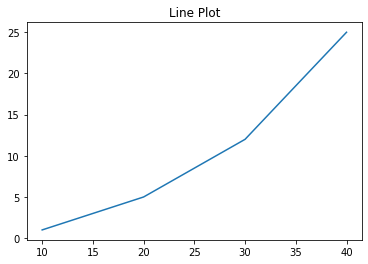

In [4]:
# matplotlib에 대해서 알아보자!

# 1. Line plot (선 그래프)

import matplotlib.pyplot as plt   # matplotlib의 sub module인 pyplot을 사용

# plot의 제목을 설정
plt.title('Line Plot')

# plot()이라는 메소드를 이용해서 line plot을 그릴 수 있다.
# x 축의 자료 위치(x 축 눈금) => tick은 기본적으로 0, 1, 2, 3
# plt.plot([1, 5, 12, 25])   # y축의 값들
# 만약 tick을 별도로 명시하고 싶으면 아래처럼 하면 된다.
plt.plot([10, 20, 30, 40],[1, 5, 12, 25])   # x축의 값, y축의 값

# show() 함수를 호출해야 한다. => 화면에 redering하고 마우스 이벤트를 기다리는 함수
# 만약 코드를 pycharm과 같은 일반 개발 툴을 이용하면 이 명령어를 이용해야 그래프가
# 나온다!
# 하지만 jupyter notebook은 셀 단위로 plot을 rendering하기 때문에
# 굳이 show()를 할 필요가 없다.
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_43396\2223585911.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지별', axis=1, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_43396\2223585911.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
C:\Users\shcho\anaconda3\envs\machine\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shcho\anaconda3\envs\machine\lib\site-packages\IPython\core

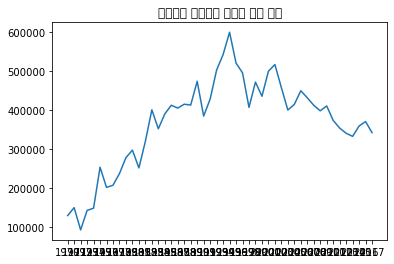

In [20]:
# 간단한 데이터를 이용해서 line plot의 여러가지 기능들을 알아보자!
# 데이터는 제공된 excel 파일을 이용해보자!
# pandas를 이용해서 excel 파일을 DataFrame으로 변환.

import numpy as np
import pandas as pd

df = pd.read_excel('../data/lineplot_sample_data.xlsx')

# NaN을 채우기 위해 ffill을 이용. 이전 행의 값으로 NaN을 채운다!
df = df.fillna(method='ffill')  # 비어있는 값을 이전 행의 값으로 채운다.
# display(df)

# 관심 있는 데이터만 추려보자!
# 서울특별시에서 다른 지역으로 이동한 데이터만 추출
# boolean indexing을 이용해서 원하는 데이터를 추출해보자
# boolean mask를 만들어서 indexing을 해보자!
bool_mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
# 전출지가 서울이고, 전입지가 서울이 아닌 것
df_seoul = df.loc[bool_mask,:]
# display(df_seoul)

df_seoul.drop('전출지별', axis=1, inplace=True)
# display(df_seoul)
# '전입지별' -> '전입지'로 column명을 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
# display(df_seoul)

# '전입지' column을 행 index로 설정한다.
df_seoul.set_index('전입지', inplace=True)
# display(df_seoul)

# 서울특별시에서 경기도로 전입한 데이터만 가져오자.
s = df_seoul.loc['경기도']

# print(s)

plt.plot(s.index, s.values)

plt.title('서울에서 경기도로 전입한 사람 추이')  # 한글이 깨져서 나온다

plt.show()

Malgun Gothic


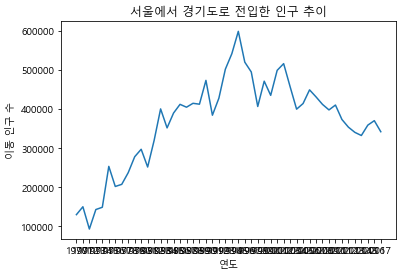

In [24]:
# 한글이 깨지는 현상부터 해결해보자!
# 한글 폰트가 있어야 한다. -> 구글 드라이브
# 필요한 module import
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore')  # 경고 메시지 출력되지 않게 설정.

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있다.
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트를 사용하는 방법으 사실 몇가지 방법이 존재한다.
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트의 특성에 대해서 알아오고 거기서 폰트의 이름을 가져온다.
print(font_name)   # Malgun Gothic
rc('font', family=font_name)

# 이전 셀에서 만들어둔 Series(연도별 경기도로 전입한 인구 수)를 이용해서
# line plot을 그려보자!
plt.plot(s.index, s.values)
plt.title('서울에서 경기도로 전입한 인구 추이')

plt.xlabel('연도')
plt.ylabel('이동 인구 수')

plt.show()

Malgun Gothic


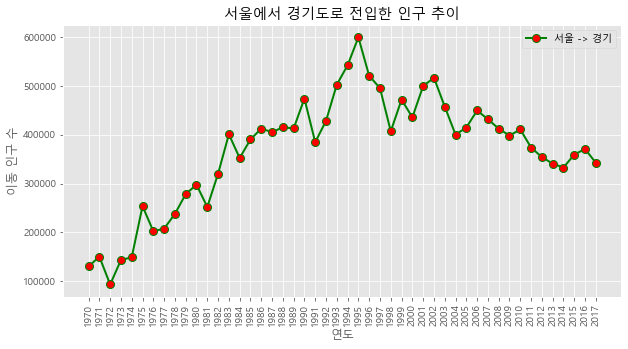

In [29]:
# 이번에는 약간의 style을 적용해보자.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore')  # 경고 메시지 출력되지 않게 설정.

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있다.
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트를 사용하는 방법은 사실 몇가지 방법이 존재한다.
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트의 특성에 대해서 알아오고 거기서 폰트의 이름을 가져온다.
print(font_name)   # Malgun Gothic
rc('font', family=font_name)

# 그래프에 스타일을 적용해보자.
plt.style.use('ggplot')

# 그래프의 크기를 설정할 수 있다.
plt.figure(figsize=(10,5))  # 단위는 인치. 가로, 세로 순으로 크기를 설정

# x축의 눈금을 읽기 어렵기 때문에 label을 회전시켜보자.
plt.xticks(rotation='vertical')

plt.plot(s.index, s.values,
         marker='o',    # o는 circle marker, s는 square marker
         markersize=8,
         markerfacecolor='r',
         color='g',
         linewidth=2)

plt.title('서울에서 경기도로 전입한 인구 추이')
plt.xlabel('연도')
plt.ylabel('이동 인구 수')

# 범례
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

In [ ]:
## sub_plot에 대해서 알아보자!
## => 쉽게 말하면 그래프 여러개를 한번에 그리는 방법.

## Figure. Axes, Axis에 대해서 간단히 알아보자.
## Figure는 canvas를 나타내는 객체이다. 쉽게 말하면 도화지 역할을 한다.
## jupyter notebook은 plot()을 사용하면 자동으로 Figure 객체를 하나 만들어준다.
## 만약 canvas(도화지)의 크기를 임의로 설정하려면 Figure 객체를 만들어야 한다.

## Figure 객체는 1개 이상의 Axes로 구성된다.
## plot() 함수를 이용하면 자동으로 Axes도 하나 생성한다.
## 코드로 여러개의 Axes를 만들어서(sub plot을 생성해서) 그래프를 그려보자!

Malgun Gothic


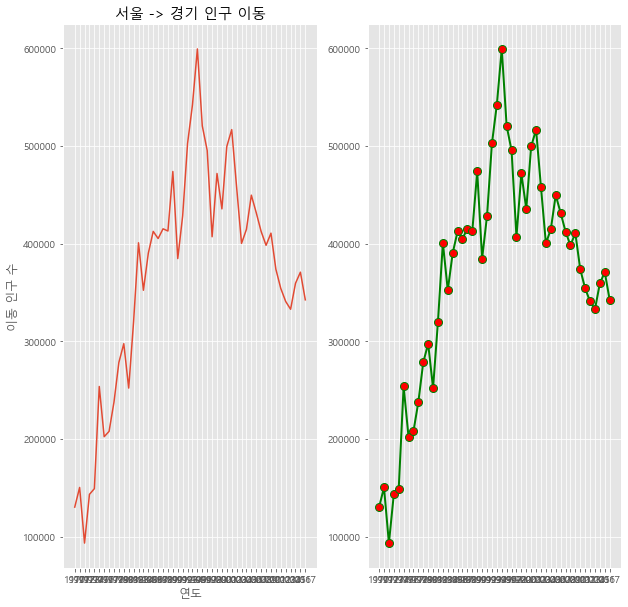

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore')  # 경고 메시지 출력되지 않게 설정.

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있다.
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트를 사용하는 방법은 사실 몇가지 방법이 존재한다.
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트의 특성에 대해서 알아오고 거기서 폰트의 이름을 가져온다.
print(font_name)   # Malgun Gothic
rc('font', family=font_name)

# 그래프에 스타일을 적용해보자.
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)   # 1행 2열의 첫번째 Axes
ax2 = fig.add_subplot(1, 2, 2)   # 1행 2열의 두번째 Axes

ax1.set_title('서울 -> 경기 인구 이동')
ax1.set_xlabel('연도')
ax1.set_ylabel('이동 인구 수')

ax1.plot(s.index, s.values)

ax2.plot(s.index, s.values,
         marker='o',    # o는 circle marker, s는 square marker
         markersize=8,
         markerfacecolor='r',
         color='g',
         linewidth=2)

plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


46.6 9.0


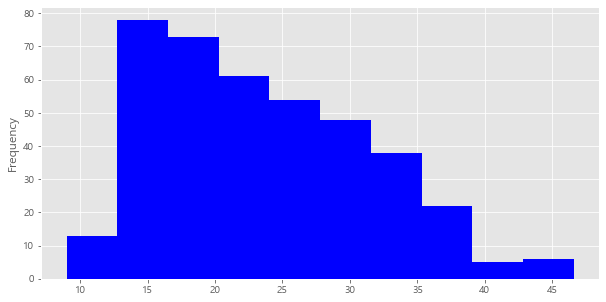

In [37]:
# 이번에는 Histogram에 대해서 알아보자!
# 변수가 하나인 단 변수 데이터의 빈도수를 그래프로 표현한 것.

# x축을 같은 크기의 여러 구간(bin)으로 나누고
# y축은 해당 구간안에 포함된 데이터의 개수(빈도, mode)를 표현.
# 당연히, x축의 구간(bin)을 조절하면 histogram의 모양은 달라지게 된다.

# 실제 데이터를 이용해서 Histogram을 그려보자!
# Data는 이전에 우리가 사용했던 MPG data set을 이용해보자!

import numpy as np
import pandas as pd

df = pd.read_csv('../data/auto-mpg.csv', header=None)   # 컬럼명이 없다.

# mpg : 연비(mile per gallon)
# cylinders : 실린더 개수
# displacement : 배기량
# horsepower : 마력(출력)
# weight : 중량
# acceleration : 가속능력
# year : 출시년도(70 => 1970년도)
# origin : 제조국 (1 : USA, 2 : EU, 3 : JPN)
# name : 차량이름
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']

display(df.head(3))
print(df['mpg'].max(), df['mpg'].min())   # mpg column의 쵀대값과 최소값을 알아보자
# 46.6 9.0

# matplotlib이 아닌 pandas의 기능을 이용해서 histogram을 그려보자!
df['mpg'].plot(kind='hist',
               bins=10,        # 최소값과 최대값 사이를 10개의 구간으로 분할
               color='blue',
               figsize=(10,5))

plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


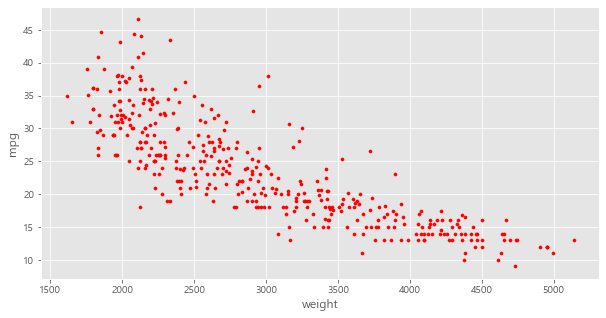

In [38]:
# Histogram은 단변수에 대한 빈도를 그래프로 표현.
# Scatter(산점도)는 서로 다른 두 변수 사이의 관계를 표현.
# 2개의 변수의 값을 각각 x축과 y축에 하나씩 놓고 데이터 값이 위치하는
# (x,y) 좌표를 찾아서 점으로 표현.
# 코드를 이용해서 산점도(scatter)를 그려보자!
# 사용하는 Data set은 MPG를 이용해보자.

import numpy as np
import pandas as pd

df = pd.read_csv('../data/auto-mpg.csv', header=None)   # 컬럼명이 없다.

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']

display(df.head(3))

# 두개의 변수를 사용해야 하니.. mpg(연비)와 weight(중량)을 이용해서
# scatter를 그려보자

df.plot(kind='scatter',
        x='weight',
        y='mpg',
        color='red',
        s=10,
        figsize=(10,5))
plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


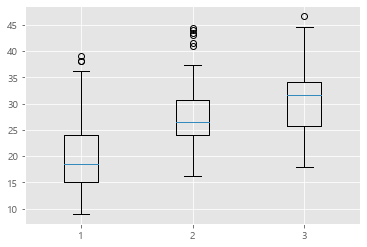

In [40]:
# Box plot
# 단변수의 데이터 분포를 살펴보기 위해서 사용!
# 이상치를 눈으로 쉽게 파악할 수 있다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/auto-mpg.csv', header=None)   # 컬럼명이 없다.

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']

display(df.head(3))

# 제조국 별 연비 분포를 boxplot으로 그려보자!
# 제조국(origin) => 1: USA, 2: EU, 3: JPN
plt.boxplot(x=[df.loc[df['origin']==1, 'mpg'],
               df.loc[df['origin']==2, 'mpg'],
               df.loc[df['origin']==3, 'mpg']])
plt.show()

In [43]:
# 학생 체력 측정 데이터를 불러오자

import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_sports_test.csv',
                 index_col='학생번호')
display(df)

# 데이터를 로딩하면 제일 먼저 shape부터 살펴봐야 한다.
print(df.shape)   # (10, 5)

# 10행 5열의 데이터.
# 5열(5변수, 5차원) 데이터.

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


(10, 5)


In [49]:
# 1차원 데이터에 대한 수치지표부터 알아보자!
# 데이터 로딩부터 해보자!

import numpy as np
import pandas as pd

df = pd.read_csv('../data/student_scores_em.csv',
                 index_col='student number')
# display(df)

scores = df['english'][:10]   # 영어성적 상위 10개로 Series 생성

scores_df = pd.DataFrame(scores)
# print(scores_df['english'][:10])   # Series에 대해서 slicing
display(scores_df)

##############################
# 이 데이터를 가지고 수치지표를 하나하나 구해보자!

,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65
